In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [ ]:
train_data, test_data = tfds.load(name="imdb_reviews", split=["train", "test"], batch_size=-1, as_supervised=True)

Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


In [ ]:
type(train_data)

tuple

In [ ]:
train_data[1]

<tf.Tensor: shape=(25000,), dtype=int64, numpy=array([0, 0, 0, ..., 0, 0, 1])>

In [ ]:
train_examples, train_labels = tfds.as_numpy(train_data)
test_examples, test_labels = tfds.as_numpy(test_data)

In [ ]:
model = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(model, input_shape=[], dtype=tf.string, trainable=True)

In [ ]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add(tf.keras.layers.Dense(16, activation="relu"))
model.add(tf.keras.layers.Dense(1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 dense (Dense)               (None, 32)                1632      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 48,192,777
Trainable params: 48,192,777
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

In [ ]:
x_val = train_examples[:10000]
y_val = train_labels[:10000]

x_train = train_examples[10000:]
y_train = train_labels[10000:]

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val,y_val),verbose=1)

Epoch 1/10
235/235 [==============================] - 13s 37ms/step - loss: 0.4550 - accuracy: 0.7871 - val_loss: 0.3266 - val_accuracy: 0.8619
Epoch 2/10
235/235 [==============================] - 8s 35ms/step - loss: 0.1951 - accuracy: 0.9275 - val_loss: 0.3325 - val_accuracy: 0.8599
Epoch 3/10
235/235 [==============================] - 8s 35ms/step - loss: 0.0731 - accuracy: 0.9783 - val_loss: 0.4070 - val_accuracy: 0.8608
Epoch 4/10
235/235 [==============================] - 8s 35ms/step - loss: 0.0205 - accuracy: 0.9961 - val_loss: 0.4699 - val_accuracy: 0.8643
Epoch 5/10
235/235 [==============================] - 8s 35ms/step - loss: 0.0051 - accuracy: 0.9996 - val_loss: 0.5318 - val_accuracy: 0.8625
Epoch 6/10
235/235 [==============================] - 8s 35ms/step - loss: 0.0018 - accuracy: 0.9999 - val_loss: 0.5735 - val_accuracy: 0.8618
Epoch 7/10
235/235 [==============================] - 8s 35ms/step - loss: 8.3657e-04 - accuracy: 1.0000 - val_loss: 0.6081 - val_accuracy: 0

In [ ]:
results = model.evaluate(test_examples, test_labels)

782/782 [==============================] - 4s 5ms/step - loss: 0.7542 - accuracy: 0.8441


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

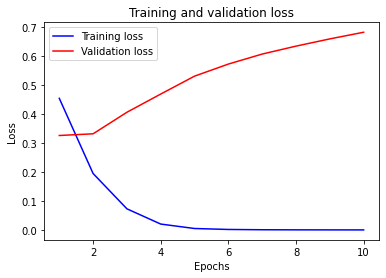

In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
examples=[
          "It was a great movie",
          "It was a very terrible and bad movie"
]

In [ ]:
result_1 = abs(model.predict(examples))

In [ ]:
result_1

array([[6.793747],
       [7.16189 ]], dtype=float32)

In [ ]:
for i in range(0, len(result_1)):
  print(result_1[i][0])

6.793747
7.16189
